<a href="https://colab.research.google.com/github/sheetaldighe/Customer_Churn_Prediction/blob/main/Group_3_Project_Customer_churn_prediction(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the necesarry python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import plotly.express as px
%matplotlib inline




In [ ]:
path = "/content/drive/MyDrive/iranian+churn+dataset.zip"



In [ ]:
df = pd.read_csv(path, index_col= False)

In [ ]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df = zipfile.ZipFile(path)    # unarchiving the dataset

df.namelist()    # This tells us the name of the file in the dataset

['Customer Churn.csv']

In [ ]:
df

<zipfile.ZipFile filename='/content/drive/MyDrive/iranian+churn+dataset.zip' mode='r'>

In [ ]:
# Reading the file
df = pd.read_csv(df.open("Customer Churn.csv"))

In [ ]:
df.head(6)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0


In [ ]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

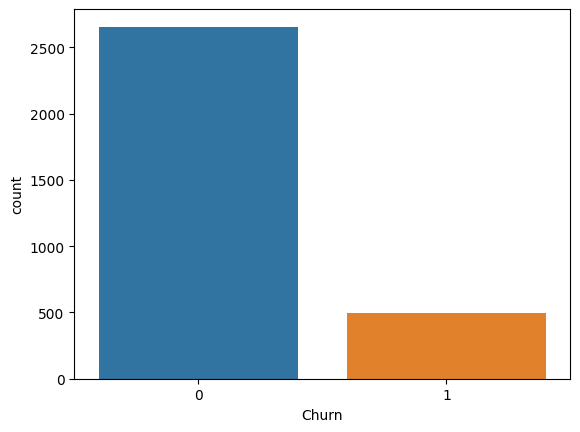

In [ ]:
sb.countplot(data = df , x ="Churn")

From the observation we can see that the data is biased as the number of rows of class 0 is much greater than class 1

In [ ]:
# checking for any missing values
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
df["Age Group"].unique()

array([3, 2, 1, 4, 5])

In [ ]:
df.Status.unique()

array([1, 2])

In [ ]:
df.Status = df.Status.replace({2: 0})

In [ ]:
df.Status.unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
# Gives us a statistical summary of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


In [ ]:
# Gives us the rows and columns of the dataset
df.shape

(3150, 14)

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

<Axes: xlabel='Age', ylabel='count'>

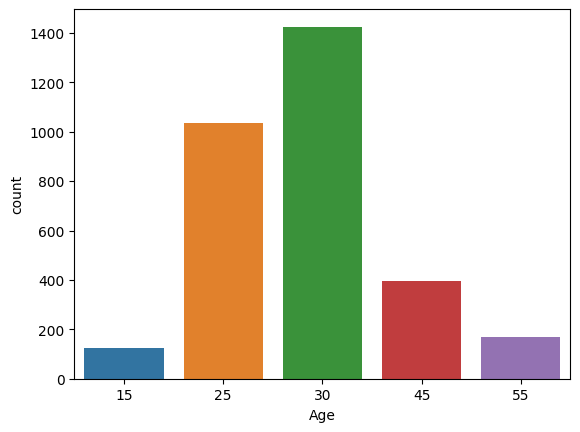

In [ ]:
sb.countplot(data = df , x ="Age")

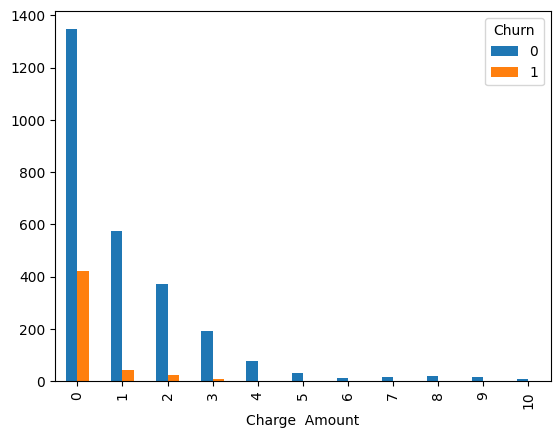

In [ ]:
pd.crosstab(df["Charge  Amount"] , df.Churn).plot(kind = "bar");

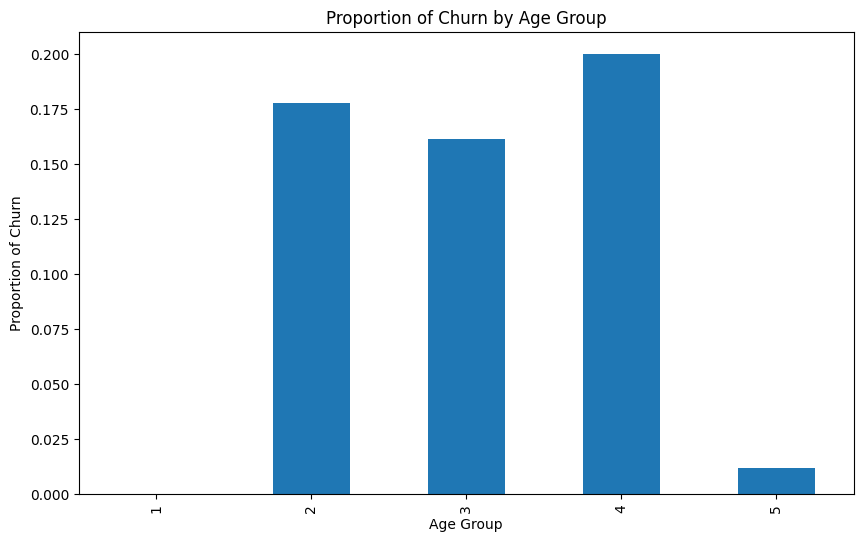

In [ ]:

# Calculate the proportion of churned customers within each age group
age_group_churn_proportions = df.groupby('Age Group')['Churn'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
age_group_churn_proportions.plot(kind='bar')

plt.title('Proportion of Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Churn')

plt.show()


<Axes: xlabel='Age', ylabel='Tariff Plan'>

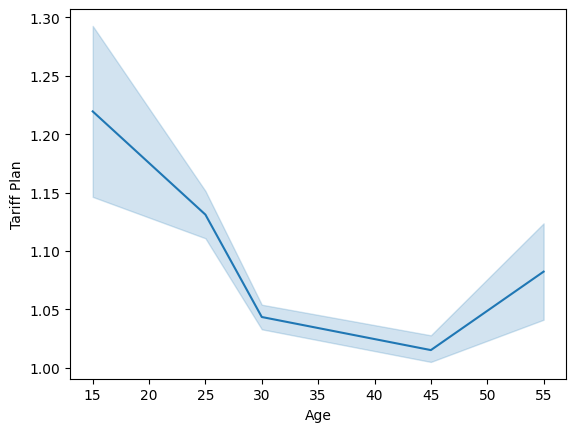

In [ ]:
sb.lineplot(data = df , y = "Tariff Plan" , x = "Age" )

<Axes: >

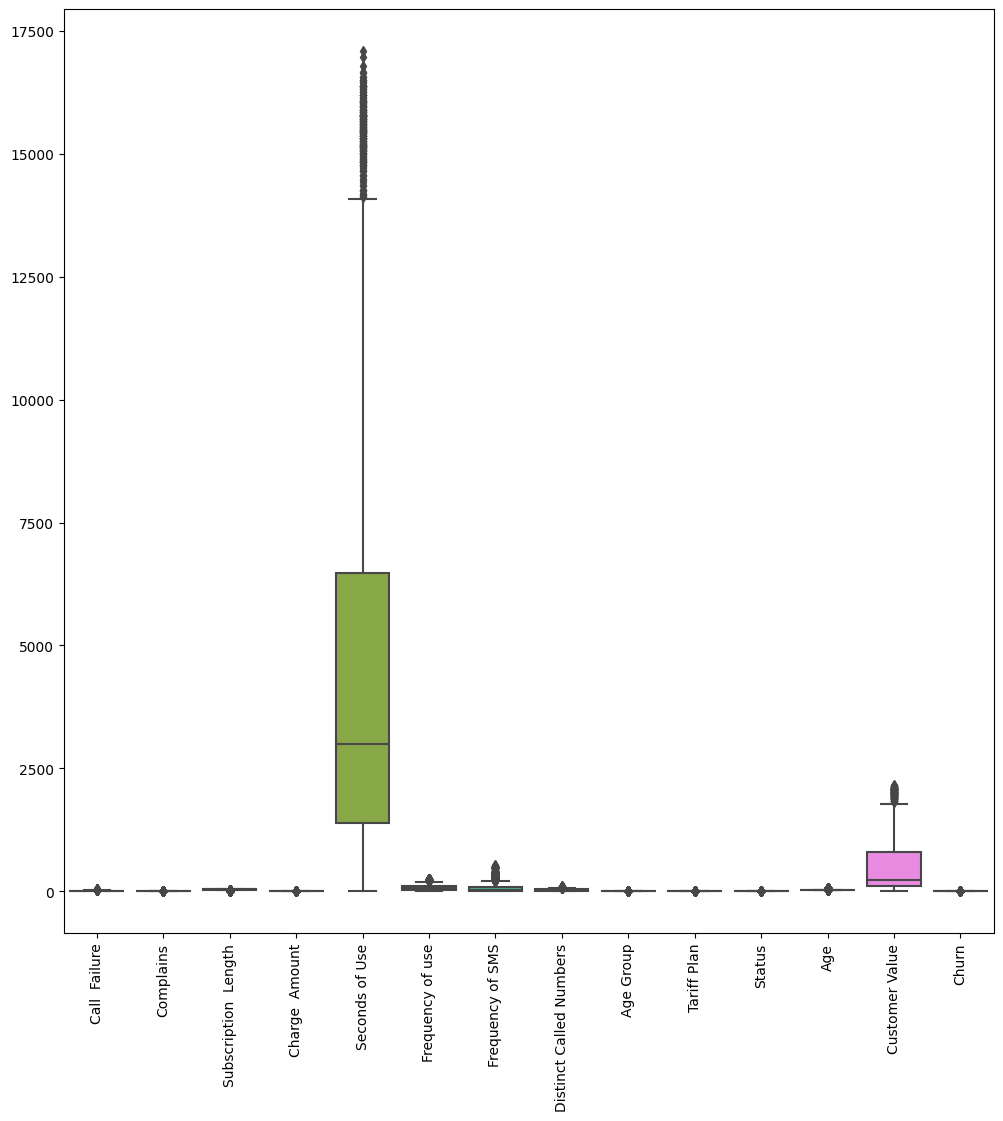

In [ ]:
plt.figure(figsize = (12,12))
plt.xticks(rotation = 90);
sb.boxplot(df)


In [ ]:
df["Age Group"].unique()

array([3, 2, 1, 4, 5])

In [ ]:
df["Tariff Plan"].unique()

array([1, 2])

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [ ]:
plot = px.box(df , x = "Customer Value")
plot.show()

In [ ]:
plot = px.box(df , x = "Seconds of Use")
plot.show()

In [ ]:
df_1 = df[(df["Customer Value"] < 1610)  & (df["Seconds of Use"] < 15000)]

In [ ]:
df_1.shape

(2840, 14)

In [ ]:
plot = px.box(df_1 , x = "Customer Value")    # We can see that our outlier has been dealt with
plot.show()

In [ ]:
plot = px.box(df_1 , x = "Seconds of Use")    # we can see that have dealt a little bit with the outlier in the Second of use
plot.show()                                   # i did not remove further due to less data set

In [ ]:

percent_outlier = ((df.shape[0]- df_1.shape[0])/df.shape[0]) * 100
print(round(percent_outlier , 2),"%")



#From this we can see that this is only 10 percent of the whole data so we can drop it     -

# df_1 will be our new data frame

9.84 %


**Traing the Dataset**

In [ ]:
df_1.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
X = df_1.drop(["Churn"] , axis = 1)
y = df_1.Churn

In [ ]:
df_1


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,0,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)
X_scaled

array([[ 0.14528168, -0.29755616,  0.66127702, ...,  0.61642564,
        -0.15482019, -0.42794293],
       [-1.07723674, -0.29755616,  0.77447253, ..., -1.6222557 ,
        -0.70034048, -0.81872117],
       [ 0.45091128, -0.29755616,  0.54808151, ...,  0.61642564,
        -0.15482019,  3.02316464],
       ...,
       [ 0.90935569, -0.29755616, -1.60263322, ...,  0.61642564,
        -0.15482019, -0.21482632],
       [-0.00753312, -0.29755616, -2.3950018 , ...,  0.61642564,
        -0.15482019,  1.84035196],
       [ 0.14528168,  3.36071009, -2.3950018 , ...,  0.61642564,
        -0.15482019, -0.67786779]])

Removed it as it was not improving the result

In [ ]:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# X_pca.shape

In [ ]:
# pca.explained_variance_ratio_

# LOGISTIC REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)

In [ ]:
len(X_test)

568

In [ ]:
len(X_train)

2272

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)
prediction = lgmodel.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       469
           1       0.86      0.51      0.64        99

    accuracy                           0.90       568
   macro avg       0.88      0.74      0.79       568
weighted avg       0.90      0.90      0.89       568



In [ ]:
lgmodel.score(X_test,y_test)

0.8996478873239436

In [ ]:
print(confusion_matrix(y_test , prediction))

[[461   8]
 [ 49  50]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)

In [ ]:
y_train.value_counts()

0    1524
1     322
Name: Churn, dtype: int64

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train , y_train)
prediction = lgmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       821
           1       0.83      0.47      0.60       173

    accuracy                           0.89       994
   macro avg       0.86      0.72      0.77       994
weighted avg       0.89      0.89      0.88       994



In [ ]:
lgmodel.score(X_test,y_test)

0.8903420523138833

In [ ]:
print(confusion_matrix(y_test , prediction))

[[804  17]
 [ 92  81]]


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)
prediction = lgmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       703
           1       0.78      0.49      0.60       149

    accuracy                           0.89       852
   macro avg       0.84      0.73      0.77       852
weighted avg       0.88      0.89      0.88       852



In [ ]:
lgmodel.score(X_test,y_test)

0.8873239436619719

In [ ]:
print(confusion_matrix(y_test , prediction))

[[683  20]
 [ 76  73]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train , y_train)
prediction = lgmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       586
           1       0.85      0.48      0.62       124

    accuracy                           0.89       710
   macro avg       0.87      0.73      0.78       710
weighted avg       0.89      0.89      0.88       710



In [ ]:
lgmodel.score(X_test,y_test)

0.8943661971830986

In [ ]:
print(confusion_matrix(y_test , prediction))

[[575  11]
 [ 64  60]]


# DECISION TREE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 10)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       469
           1       0.75      0.74      0.74        99

    accuracy                           0.91       568
   macro avg       0.85      0.84      0.85       568
weighted avg       0.91      0.91      0.91       568



In [ ]:
dmodel.score(X_test,y_test)

0.9119718309859155

In [ ]:
print(confusion_matrix(y_test , prediction))

[[445  24]
 [ 26  73]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 5)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       703
           1       0.69      0.71      0.70       149

    accuracy                           0.89       852
   macro avg       0.82      0.82      0.82       852
weighted avg       0.90      0.89      0.89       852



In [ ]:
dmodel.score(X_test,y_test)

0.8943661971830986

In [ ]:
print(confusion_matrix(y_test , prediction))

[[656  47]
 [ 43 106]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 15)
dmodel.fit(X_train, y_train)
prediction = dmodel.predict(X_test)

In [ ]:

print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       586
           1       0.79      0.81      0.80       124

    accuracy                           0.93       710
   macro avg       0.87      0.88      0.88       710
weighted avg       0.93      0.93      0.93       710



In [ ]:
dmodel.score(X_test,y_test)

0.9295774647887324

In [ ]:
print(confusion_matrix(y_test , prediction))

[[559  27]
 [ 23 101]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 5)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       821
           1       0.73      0.77      0.75       173

    accuracy                           0.91       994
   macro avg       0.84      0.86      0.85       994
weighted avg       0.91      0.91      0.91       994



In [ ]:
dmodel.score(X_test,y_test)

0.9114688128772636

In [ ]:
print(confusion_matrix(y_test , prediction))

[[773  48]
 [ 40 133]]


# RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 10)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       821
           1       0.89      0.83      0.86       173

    accuracy                           0.95       994
   macro avg       0.93      0.90      0.92       994
weighted avg       0.95      0.95      0.95       994



In [ ]:
rfmodel.score(X_test,y_test)

0.9527162977867203

In [ ]:
print(confusion_matrix(y_test , prediction))

[[804  17]
 [ 30 143]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 15)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       703
           1       0.85      0.83      0.84       149

    accuracy                           0.94       852
   macro avg       0.91      0.90      0.90       852
weighted avg       0.94      0.94      0.94       852



In [ ]:
rfmodel.score(X_test,y_test)

0.9448356807511737

In [ ]:
print(confusion_matrix(y_test , prediction))

[[682  21]
 [ 26 123]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 20)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       586
           1       0.88      0.85      0.86       124

    accuracy                           0.95       710
   macro avg       0.93      0.91      0.92       710
weighted avg       0.95      0.95      0.95       710



In [ ]:
rfmodel.score(X_test,y_test)

0.9535211267605633

In [ ]:
print(confusion_matrix(y_test , prediction))

[[572  14]
 [ 19 105]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 25)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       469
           1       0.89      0.82      0.85        99

    accuracy                           0.95       568
   macro avg       0.93      0.90      0.91       568
weighted avg       0.95      0.95      0.95       568



In [ ]:
rfmodel.score(X_test,y_test)

0.9507042253521126

In [ ]:
print(confusion_matrix(y_test , prediction))

[[459  10]
 [ 18  81]]


KNeighborClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       586
           1       0.85      0.78      0.82       124

    accuracy                           0.94       710
   macro avg       0.90      0.88      0.89       710
weighted avg       0.94      0.94      0.94       710

[[569  17]
 [ 27  97]]


In [ ]:
knnc.score(X_test,y_test)

0.9380281690140845

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       703
           1       0.79      0.77      0.78       149

    accuracy                           0.92       852
   macro avg       0.87      0.86      0.87       852
weighted avg       0.92      0.92      0.92       852

[[673  30]
 [ 35 114]]


In [ ]:
knnc.score(X_test,y_test)

0.9237089201877934

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state= 30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       821
           1       0.84      0.79      0.81       173

    accuracy                           0.94       994
   macro avg       0.90      0.88      0.89       994
weighted avg       0.94      0.94      0.94       994

[[794  27]
 [ 36 137]]


In [ ]:
knnc.score(X_test,y_test)

0.9366197183098591

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       469
           1       0.85      0.78      0.81        99

    accuracy                           0.94       568
   macro avg       0.90      0.87      0.89       568
weighted avg       0.94      0.94      0.94       568

[[455  14]
 [ 22  77]]


In [ ]:
knnc.score(X_test,y_test)

0.9366197183098591

In [ ]:
# cm = confusion_matrix(y_test , prediction)

In [ ]:
# sb.heatmap(cm, annot=True)

SupportVectorMachine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       586
           1       0.96      0.59      0.73       124

    accuracy                           0.92       710
   macro avg       0.94      0.79      0.84       710
weighted avg       0.93      0.92      0.92       710

[[583   3]
 [ 51  73]]


In [ ]:
sv.score(X_test,y_test)

0.923943661971831

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       703
           1       0.97      0.58      0.73       149

    accuracy                           0.92       852
   macro avg       0.94      0.79      0.84       852
weighted avg       0.93      0.92      0.92       852

[[700   3]
 [ 62  87]]


In [ ]:
sv.score(X_test,y_test)

0.9237089201877934

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))


              precision    recall  f1-score   support

           0       0.92      1.00      0.95       821
           1       0.96      0.57      0.71       173

    accuracy                           0.92       994
   macro avg       0.94      0.78      0.83       994
weighted avg       0.92      0.92      0.91       994

[[817   4]
 [ 75  98]]


In [ ]:
sv.score(X_test,y_test)

0.920523138832998

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       469
           1       0.97      0.60      0.74        99

    accuracy                           0.93       568
   macro avg       0.94      0.80      0.85       568
weighted avg       0.93      0.93      0.92       568

[[467   2]
 [ 40  59]]


In [ ]:
sv.score(X_test,y_test)

0.926056338028169